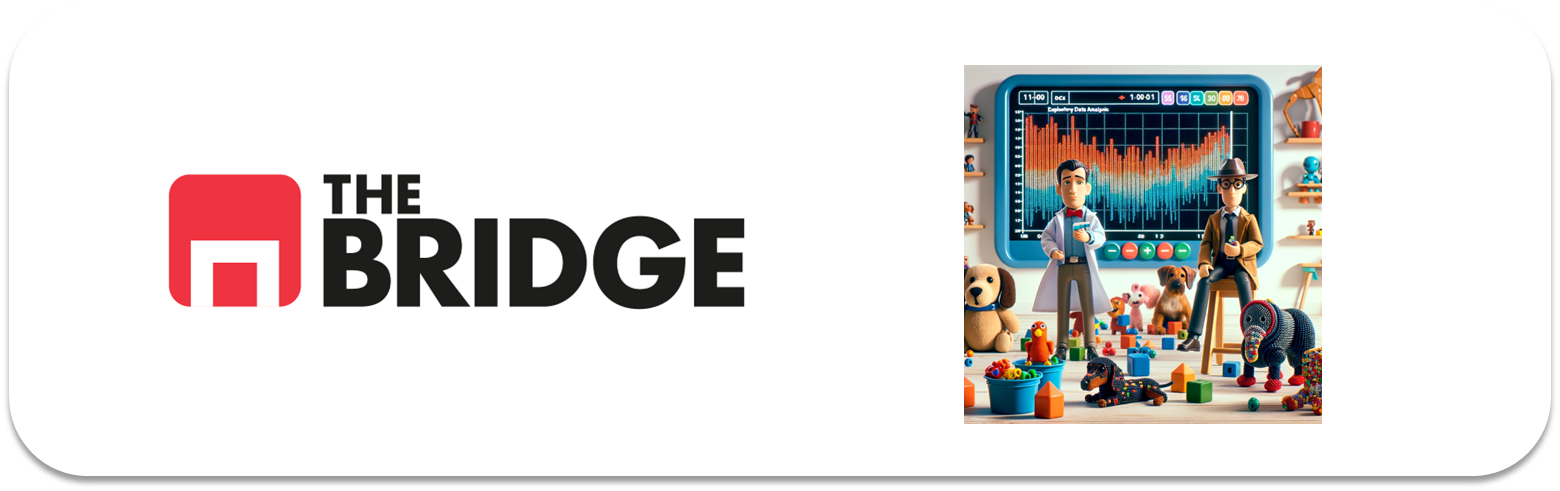

## PRACTICA OBLIGATORIA: **Análisis Multivariante**

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot


## #1: Titanic

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df = pd.read_csv("./data/titanic.csv")

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
df.drop(["deck","survived","pclass","embarked"],axis = 1, inplace = True)

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [5]:
df["family_members"] = df.parch + df.sibsp

In [6]:
df.drop(columns=["parch","sibsp"],inplace=True)
df.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [7]:
df["embark_town"].fillna(df["embark_town"].mode()[0],inplace= True)

C:\Users\nicho\AppData\Local\Temp\ipykernel_18148\2443605900.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["embark_town"].fillna(df["embark_town"].mode()[0],inplace= True)


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [8]:
df.age.fillna(df.age.median(),inplace=True)

C:\Users\nicho\AppData\Local\Temp\ipykernel_18148\2253341104.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.age.fillna(df.age.median(),inplace=True)


### #1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

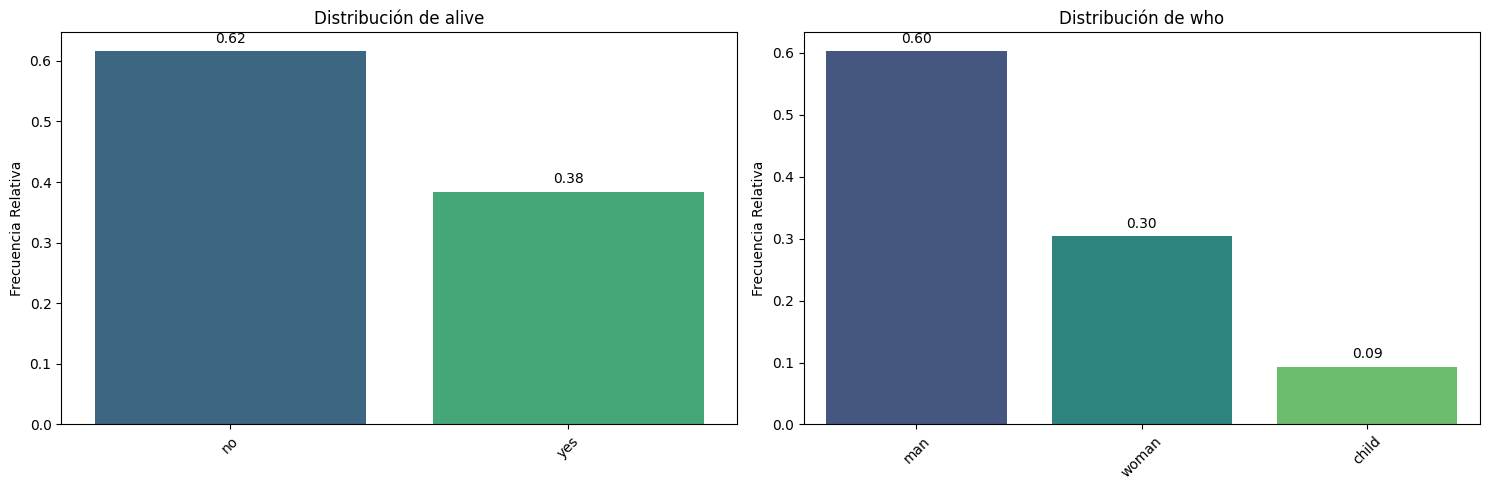

In [9]:
pinta_distribucion_categoricas(df,["alive","who"],relativa=True,mostrar_valores=True)

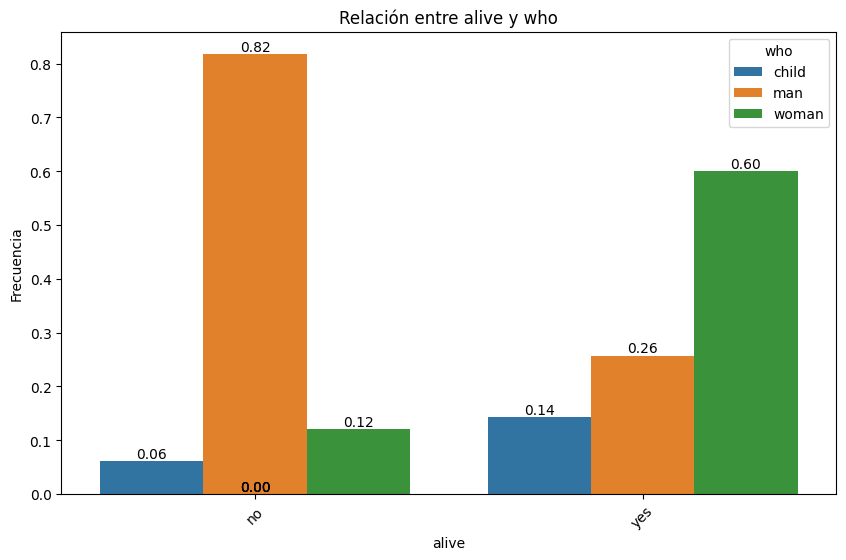

In [10]:
plot_categorical_relationship_fin(df,"alive","who",relative_freq=True,show_values=True)

* En absoluto - Sobrevivieron 49 niños, 88 hombres y 205 mujeres

In [11]:
df[df["alive"]=="yes"]["who"].value_counts()/df.who.value_counts()*100

who
child    59.036145
man      16.387337
woman    75.645756
Name: count, dtype: float64

* En relativo - sobrevivieron 75% de los mujeres, 59% de los niños y 16% de los hombres

In [12]:
df['age_group'] = 'adult'

# Set to 'child' where who == 'child'
df.loc[df['who'] == 'child', 'age_group'] = 'child'

# Check
df[['who', 'age_group']].head()

,who,age_group
0,man,adult
1,woman,adult
2,woman,adult
3,woman,adult
4,man,adult


In [13]:
tabla_contingencia = pd.crosstab(df['alive'], df['sex'])

tabla_contingencia

sex,female,male
alive,,
no,81,468
yes,233,109


In [14]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 260.71702016732104
P-Value: 1.1973570627755645e-58
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


In [15]:
tabla_contingencia = pd.crosstab(df['alive'], df['age_group'])

tabla_contingencia

age_group,adult,child
alive,,
no,515,34
yes,293,49


In [16]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 15.556993340077092
P-Value: 8.005497211300105e-05
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[497.85858586  51.14141414]
 [310.14141414  31.85858586]]


## Pregunta 1 conclusion

Existe una relacion estadisticamente relativa entre el sexo y la supervivencia. Y tambien, entre ser niño o adulto.

# Pregunta 2

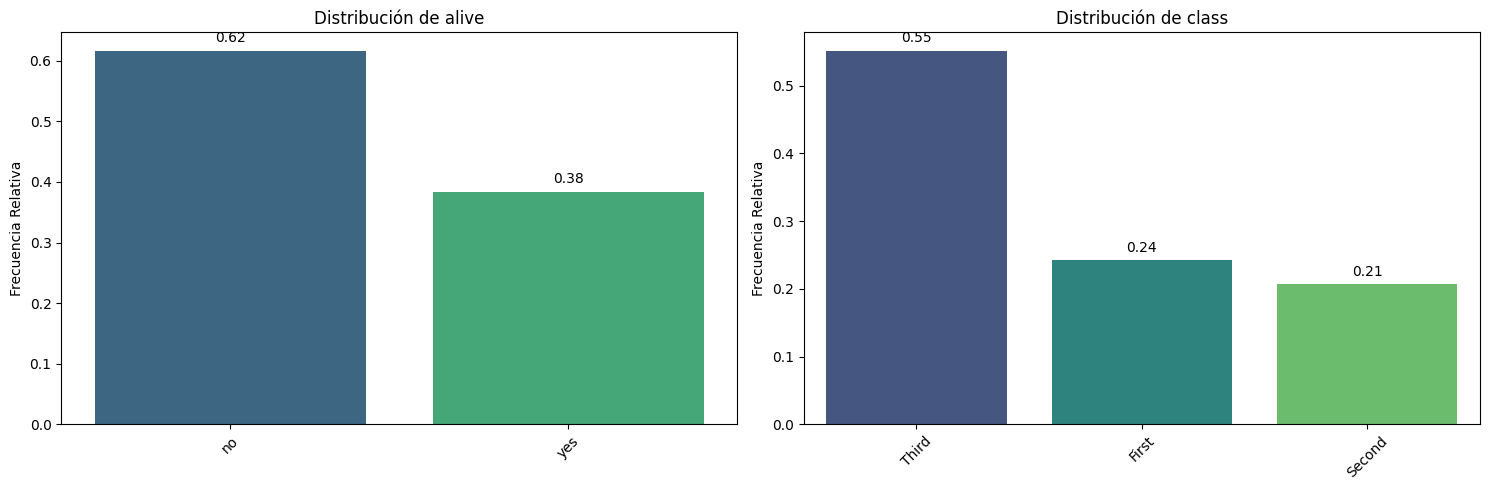

In [17]:
pinta_distribucion_categoricas(df,["alive","class"],relativa=True,mostrar_valores=True)

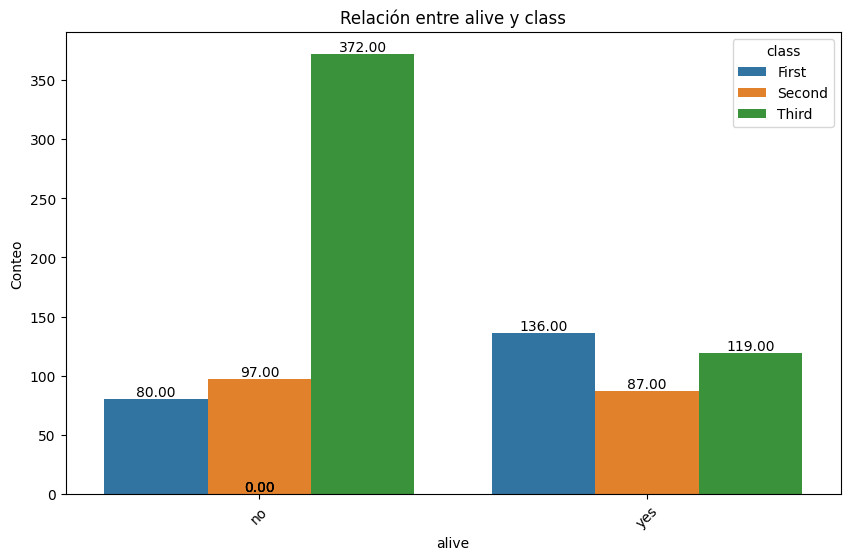

In [18]:
plot_categorical_relationship_fin(df,"alive","class",show_values=True)

In [19]:
df[df["alive"]=="yes"]["class"].value_counts()/df["class"].value_counts()*100

class
First     62.962963
Second    47.282609
Third     24.236253
Name: count, dtype: float64

* En terminos relativos: 
 - 63% de los pasajeros de first class sobrevivieron
 - 47 % de los pasajeros de second class sobrevivieron
 - 24 % de los pasajeros de third class sobrevivieron

In [20]:
tabla_contingencia = pd.crosstab(df['alive'], df['class'])

tabla_contingencia

class,First,Second,Third
alive,,,
no,80,97,372
yes,136,87,119


In [21]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


## Pregunta 2 conclusion
* Sobrevivieron 136 personas de first class(40%), 87 de second class(25%) y 119 de third class(35%).
* existe una relation significativa 

# Pregunta 3

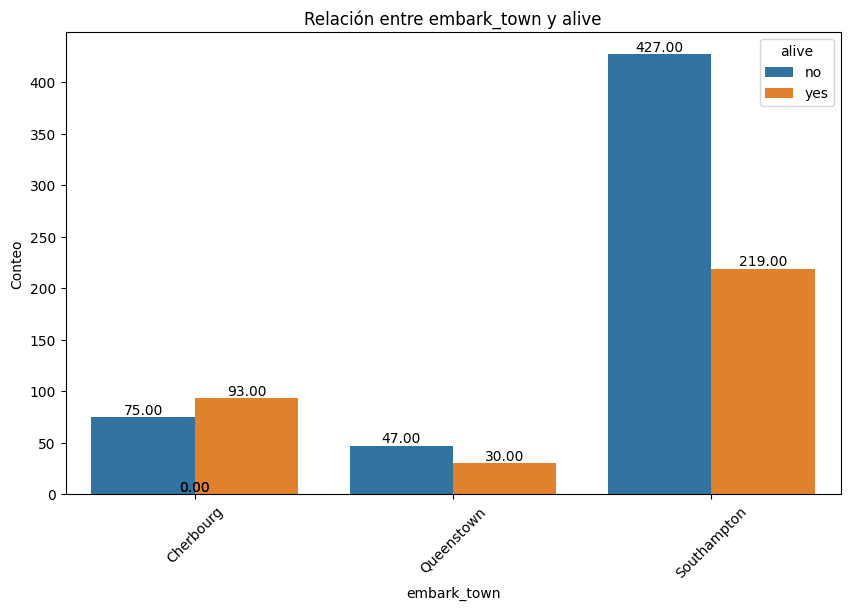

In [22]:
plot_categorical_relationship_fin(df,"embark_town","alive",show_values=True)

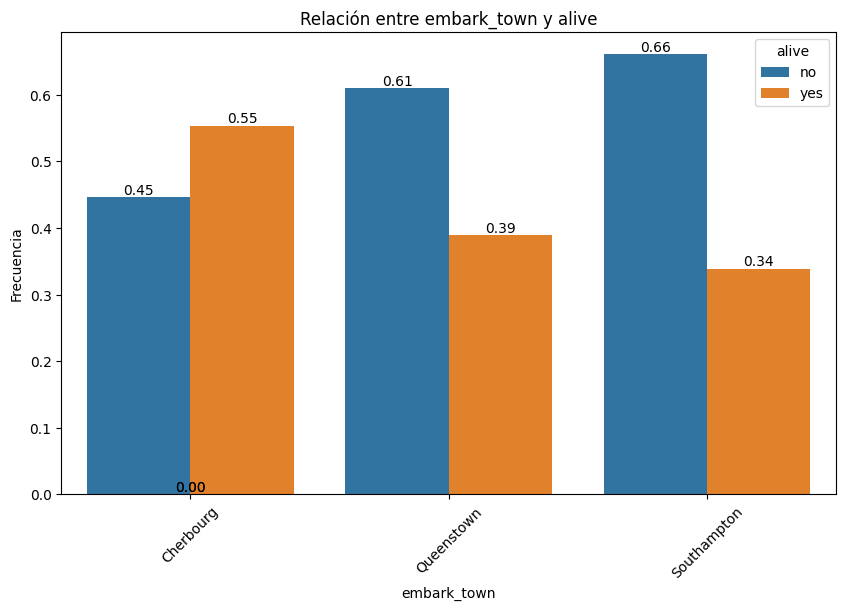

In [23]:
plot_categorical_relationship_fin(df,"embark_town","alive",relative_freq=True,show_values=True)

In [24]:
df[df["alive"]=="yes"]["embark_town"].value_counts()/df["embark_town"].value_counts()*100

embark_town
Southampton    33.900929
Cherbourg      55.357143
Queenstown     38.961039
Name: count, dtype: float64

In [25]:
tabla_contingencia = pd.crosstab(df['alive'], df['class'])

tabla_contingencia

class,First,Second,Third
alive,,,
no,80,97,372
yes,136,87,119


In [26]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


## pregunta 3 conclusion
* Mas gente de Southampton sobrevivieron (219) pero porcentualmente mas gente de cherbourg sobrevivieron (55%)
* existe una relation estadistica significativa entre haber embarcado de una de las tres cuidades y sobrevivir o no.

# Pregunta 4

¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

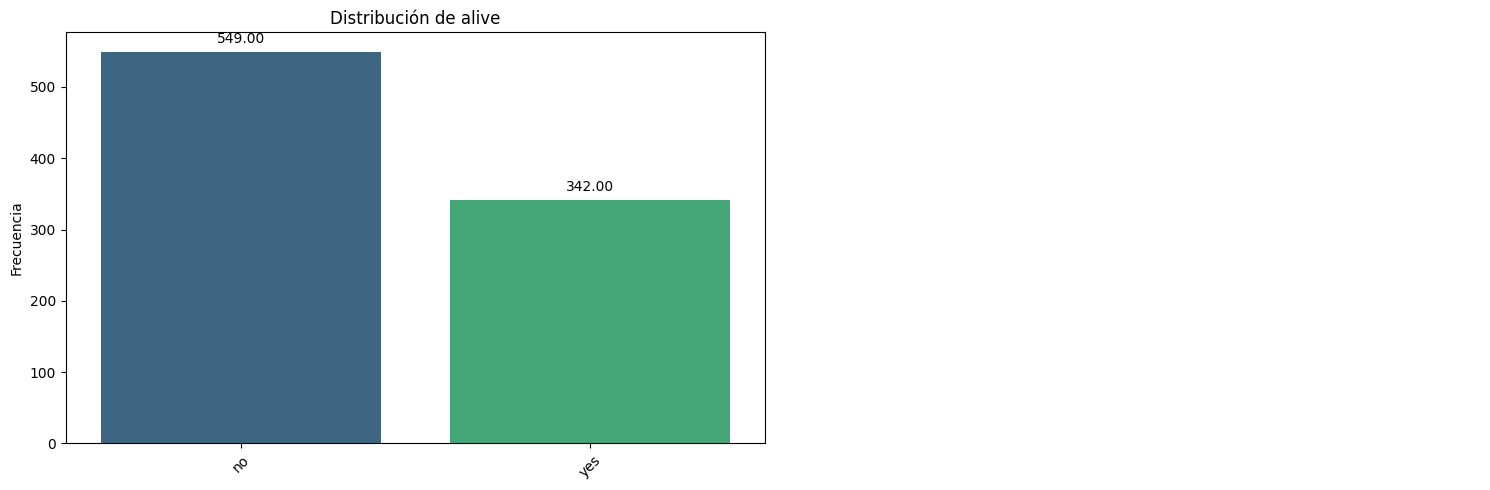

In [27]:
pinta_distribucion_categoricas(df,["alive"],mostrar_valores=True)

(2,)


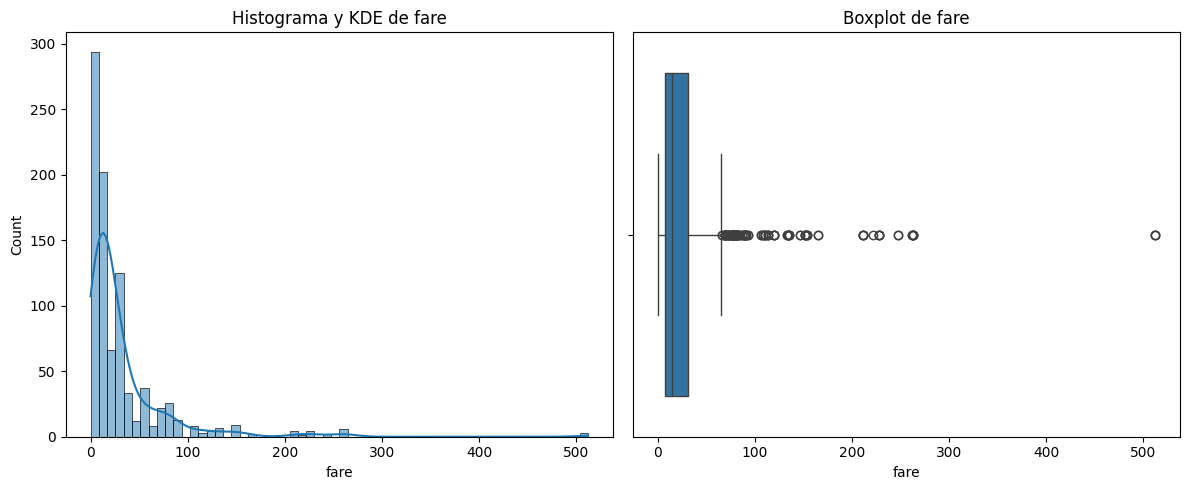

In [28]:
plot_combined_graphs(df,["fare"])

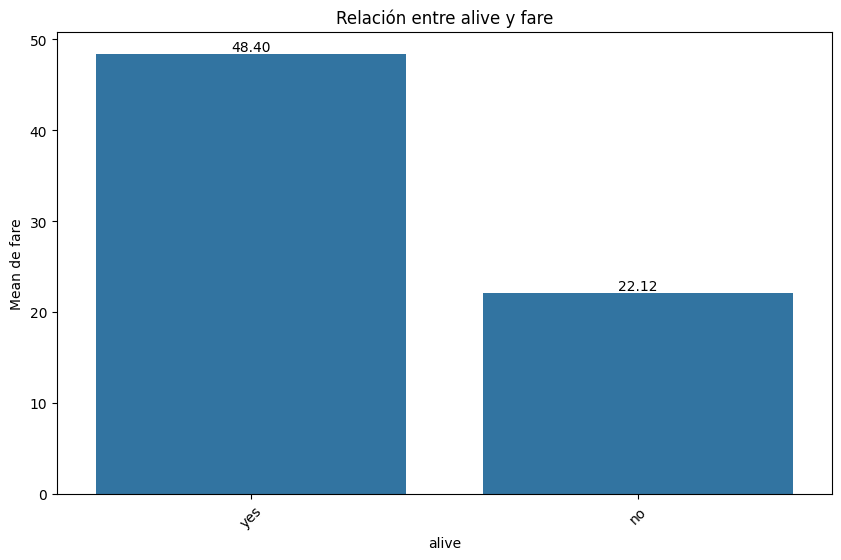

In [29]:
plot_categorical_numerical_relationship(df,"alive","fare",show_values=True,measure = "mean")

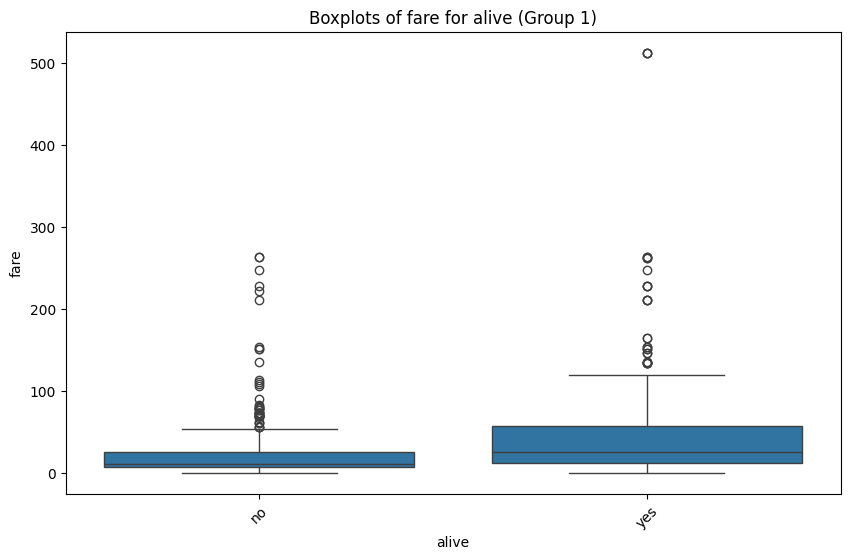

In [30]:
plot_grouped_boxplots(df,"alive","fare")

In [31]:
from scipy.stats import mannwhitneyu

In [32]:
grupo_a = df.loc[df["alive"] == "yes"]["fare"]
grupo_b = df.loc[df["alive"] == "no"]["fare"]

In [33]:
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


## Conclusion 4
La gente que pagaron mas tenian mas posibilidad de sobrevivir.

# Pregunta 5
5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

In [34]:
df.loc[df["fare"] == 0]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,age_group
179,male,36.0,0.0,Third,man,True,Southampton,no,True,0,adult
263,male,40.0,0.0,First,man,True,Southampton,no,True,0,adult
271,male,25.0,0.0,Third,man,True,Southampton,yes,True,0,adult
277,male,28.0,0.0,Second,man,True,Southampton,no,True,0,adult
302,male,19.0,0.0,Third,man,True,Southampton,no,True,0,adult
413,male,28.0,0.0,Second,man,True,Southampton,no,True,0,adult
466,male,28.0,0.0,Second,man,True,Southampton,no,True,0,adult
481,male,28.0,0.0,Second,man,True,Southampton,no,True,0,adult
597,male,49.0,0.0,Third,man,True,Southampton,no,True,0,adult
633,male,28.0,0.0,First,man,True,Southampton,no,True,0,adult


In [35]:
df[df["fare"] == df.fare.max()]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,age_group
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0,adult
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1,adult
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0,adult


## Conclusion 5
* Mirando la informacion de la gente que no pagaron, vemos que viajaban en diferentes clases. Asi qie es posible que existieron unos tickets complimentarios para esa gente, que podrian algun tipo de empleado de la compania
* Hubo  tres personas que pagaron el maximum precio y los tres sobrevivieron

# Pregunta 6
6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

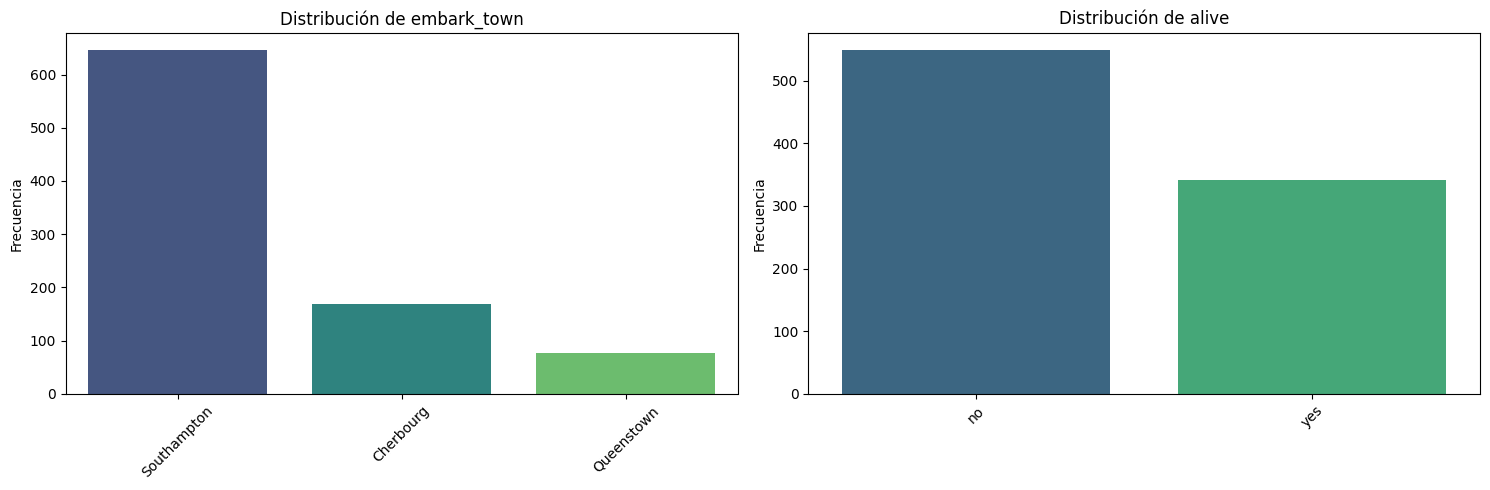

In [36]:
pinta_distribucion_categoricas(df,["embark_town","alive"])

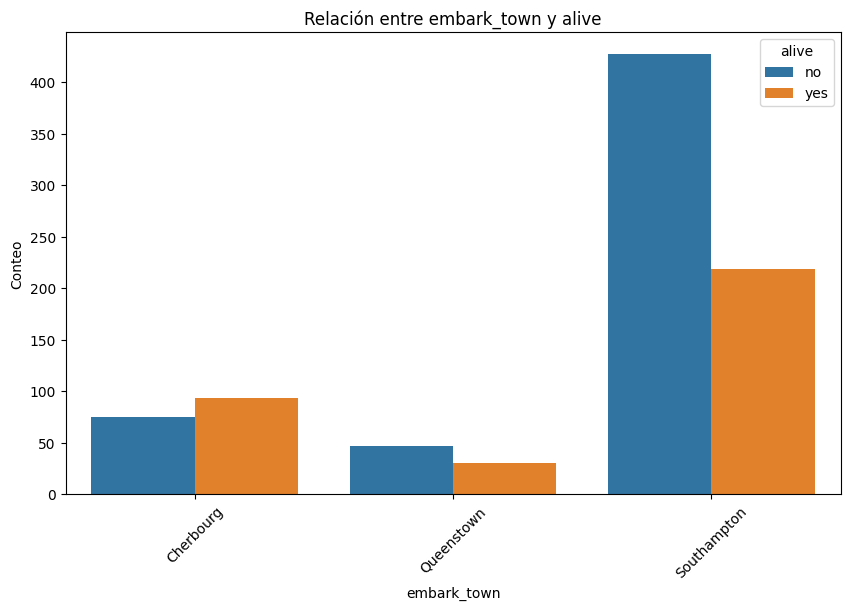

In [37]:
plot_categorical_relationship_fin(df,"embark_town","alive")

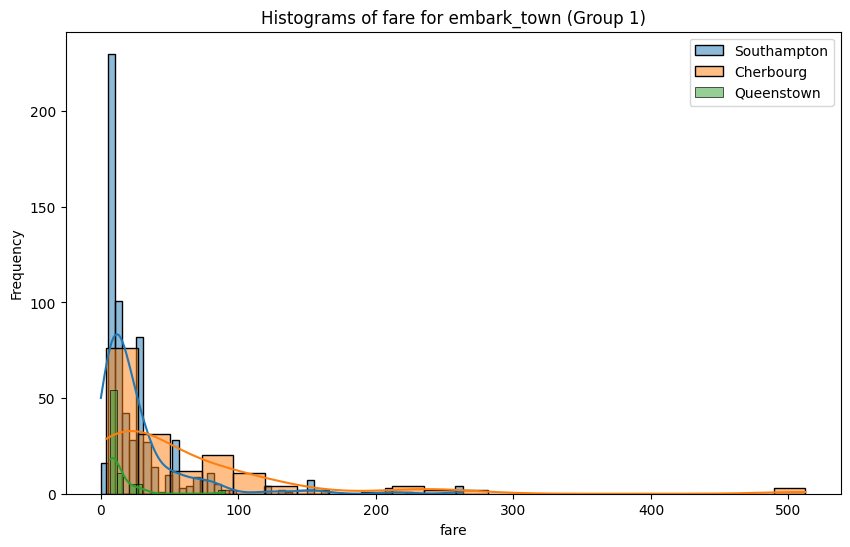

In [38]:
plot_grouped_histograms(df,"embark_town","fare",4)

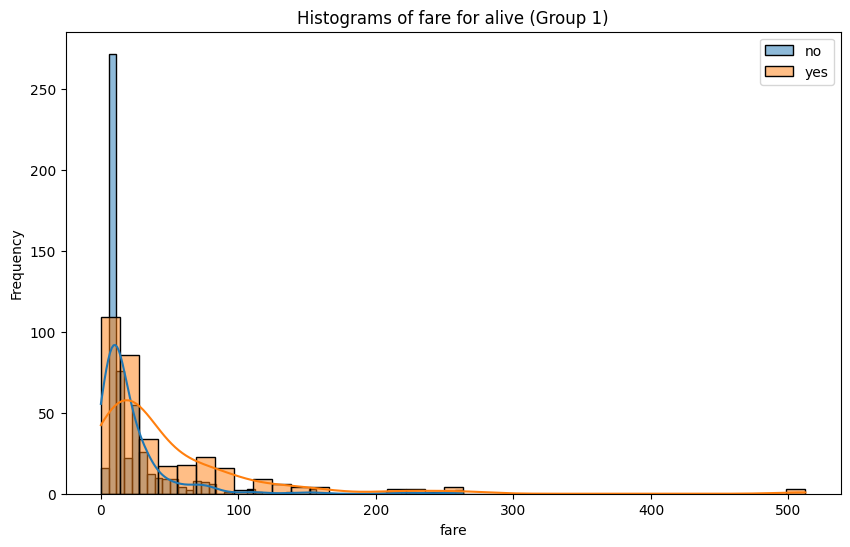

In [39]:
plot_grouped_histograms(df,"alive","fare",4)

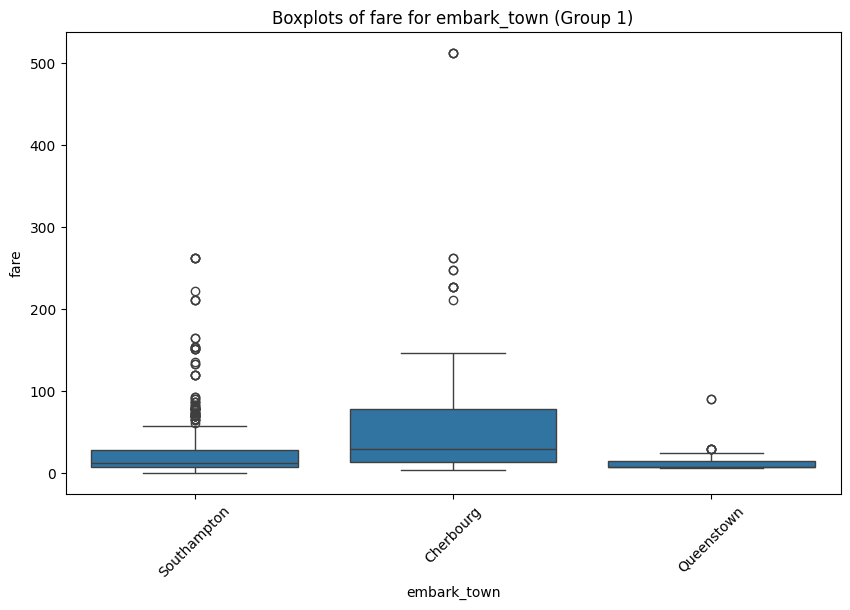

In [40]:
plot_grouped_boxplots(df,"embark_town","fare")

# Pregunta 7

Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

In [41]:
df.groupby(["class","age_group"])["alive"].value_counts()

class   age_group  alive
First   adult      yes      131
                   no        79
        child      yes        5
                   no         1
Second  adult      no        97
                   yes       68
        child      yes       19
Third   adult      no       339
                   yes       94
        child      no        33
                   yes       25
Name: count, dtype: int64

In [42]:
df.groupby(["class","age_group"])["alive"].value_counts(normalize=True)*100

class   age_group  alive
First   adult      yes       62.380952
                   no        37.619048
        child      yes       83.333333
                   no        16.666667
Second  adult      no        58.787879
                   yes       41.212121
        child      yes      100.000000
Third   adult      no        78.290993
                   yes       21.709007
        child      no        56.896552
                   yes       43.103448
Name: proportion, dtype: float64

## Conclusion pregunta 7
* En terminos absolutos, mas adultos de first class sobrevivieron (131)
* En terminos relativas, sobrevivieron mas niños de second class (100%)

# Pregunta 8
8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

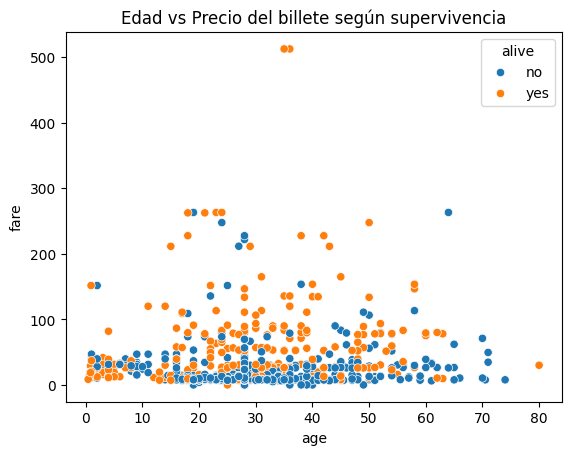

In [64]:
sns.scatterplot(data=df, x='age', y='fare', hue='alive')
plt.title("Edad vs Precio del billete según supervivencia")
plt.show()

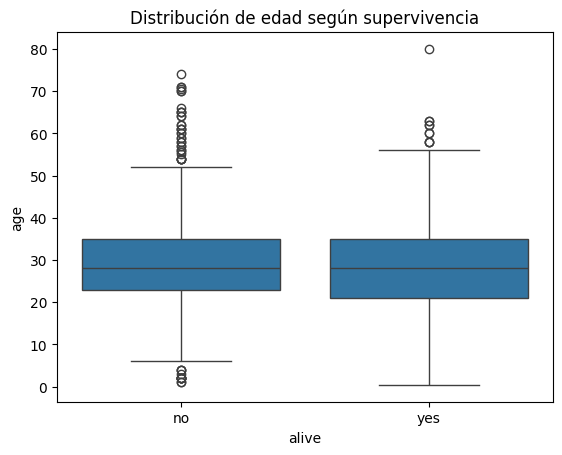

In [65]:
sns.boxplot(data=df, x='alive', y='age')
plt.title("Distribución de edad según supervivencia")
plt.show()

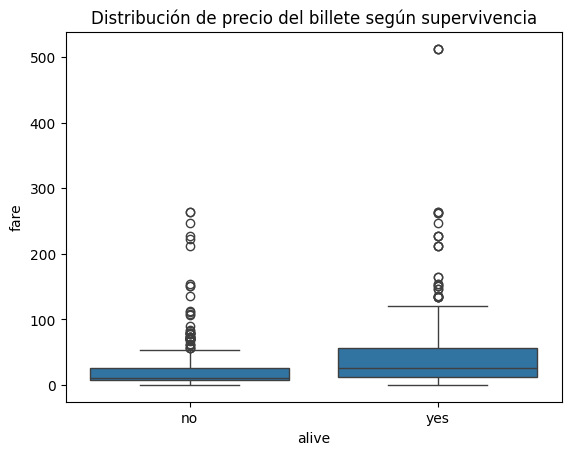

In [66]:
sns.boxplot(data=df, x='alive', y='fare')
plt.title("Distribución de precio del billete según supervivencia")
plt.show()

## Conclusion Pregunta 8
* Podemos decir que los jovenes o la gente que pago mas tenian mas posibilidad de sobrevivir.

## #EXTRA: Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #EXTRA.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #EXTRA.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #EXTRA.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?